# Analysis of timeseries data

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from matplotlib import pyplot as plt
import sklearn

from pandas import read_csv
from pandas import DataFrame
from sklearn.linear_model import LinearRegression

from tqdm.notebook import tnrange 

from plotnine import *

# Local imports
from common import *
from convenience import *

## I. Data import 

Let us import the dataseries of a single variable. 

,x
0,0.000000
1,1.000000
2,-0.485975
3,-0.747044
4,0.864313


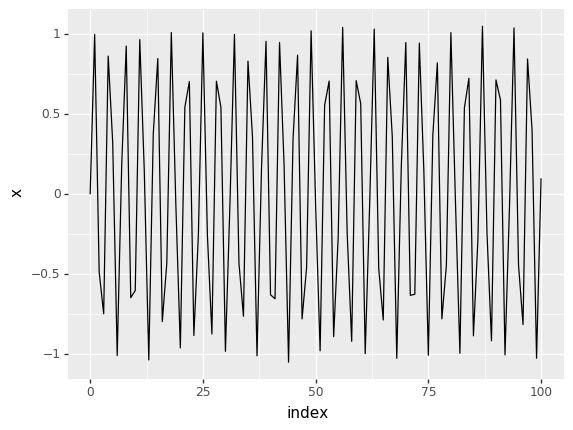

<ggplot: (-9223363253396659719)>

In [2]:
df = read_csv('data/timeseries/challenge.csv', index_col=0)
display(head(df))
ggplot(df.loc[:100,].reset_index()) + geom_line(aes(x='index',y='x'))

## II. Preparation for model fitting

Let us consider a mode where $x_{i+1}$ depends on three previous values. Then we need to collect the data in the right format.

In [3]:
df = (df
      .assign(s0 = df['x'].shift(1))
      .assign(s1 = df['x'].shift(2))
      .assign(s2 = df['x'].shift(3)))

mdisplay([head(df), head(df.loc[3:])], ['Timeseries with delayed values', 'Same without missing values'])

Timeseries with delayed values Same without missing values 
 
 
 x 
 s0 
 s1 
 s2 
 
 
 
 
 0.000000 
 NaN 
 NaN 
 NaN 
 
 
 1.000000 
 0.000000 
 NaN 
 NaN 
 
 
 -0.485975 
 1.000000 
 0.000000 
 NaN 
 
 
 -0.747044 
 -0.485975 
 1.000000 
 0.0 
 
 
 0.864313 
 -0.747044 
 -0.485975 
 1.0 
 
 
 
 
 
 x 
 s0 
 s1 
 s2 
 
 
 
 
 -0.747044 
 -0.485975 
 1.000000 
 0.000000 
 
 
 0.864313 
 -0.747044 
 -0.485975 
 1.000000 
 
 
 0.323895 
 0.864313 
 -0.747044 
 -0.485975 
 
 
 -1.008396 
 0.323895 
 0.864313 
 -0.747044 
 
 
 0.185753 
 -1.008396 
 0.323895 
 0.864313

## III. Model fitting

To find a model we can build a linear model $x\sim s0+s1+s2+1$.

In [4]:
from matplotlib.pyplot import bar as bar_plot

R^2 score: 0.9998102071811404
sigma=0.010075565023370914


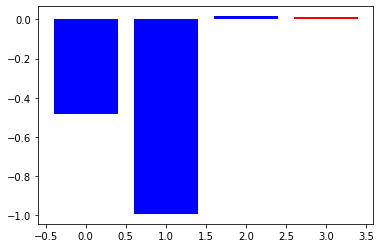

In [5]:
X = df.loc[ 3:, ['s0', 's1', 's2']]
y = df.loc[ 3:, 'x']

# Model fitting
model = LinearRegression()
model.fit(X, y)
print('R^2 score: {}'.format(model.score(X, y)))

# Finding the variance parameter
residuals = model.predict(X) - y
sigma = np.std(residuals)
print('sigma={}'.format(sigma))

# Standard visualisation of coefficients
beta = np.append(model.coef_, model.intercept_)
bar_plot(range(4), beta, color = ['blue'] * 3 + ['red'])
plt.show()

## IV. Diagostics

Model is well-fitted if residuals do not correlate with previous values and are approximately normally distributed.

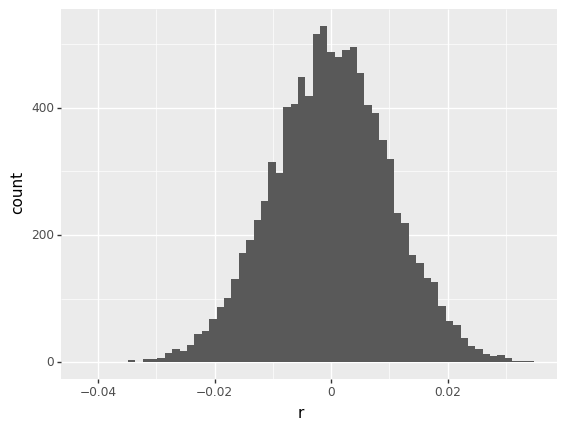

<ggplot: (-9223363253404418153)>

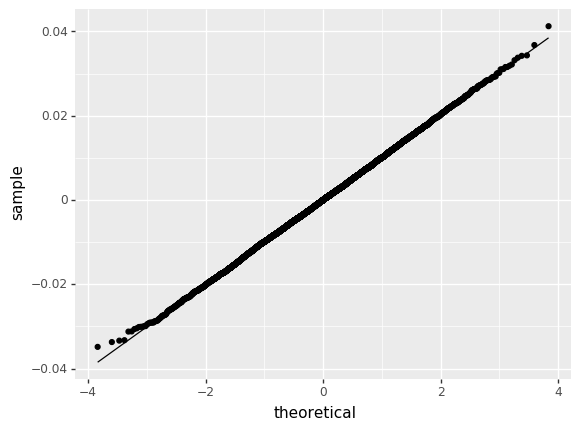

<ggplot: (8783457381745)>

S0: -1.2839858790660826e-14
S1: 9.564403488816363e-15
S2: 8.093253012014825e-15
x: 0.013776531452412949


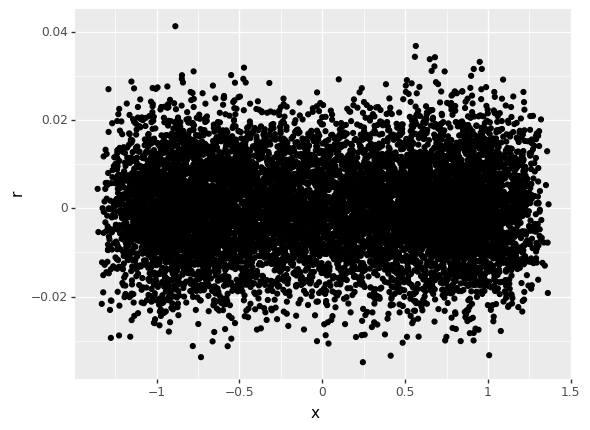

<ggplot: (-9223363253397394060)>

In [6]:
# Histogram
p = ggplot(DataFrame({'r': residuals})) + geom_histogram(aes(x = 'r'), bins=61)
display(p)

# Distribution test
residuals = y - model.predict(X)
p = ggplot(DataFrame({'r': residuals}), aes(sample = 'r'))
display(p + stat_qq() + stat_qq_line())

# Correlation with inputs
print('S0: {}'.format(np.corrcoef(residuals, X['s0'])[0,1]))
print('S1: {}'.format(np.corrcoef(residuals, X['s1'])[0,1]))
print('S2: {}'.format(np.corrcoef(residuals, X['s2'])[0,1]))

# Correlation with output
print('x: {}'.format(np.corrcoef(residuals, y)[0,1]))

display(ggplot(DataFrame({'r': residuals, 'x': y})) + geom_point(aes(x='x', y='r')))

# Homework

## 4.1  Comparison of different linear models  (<font color='red'>2p</font>)  

A priori one does not know the lag-structure, i.e. how many previous states are needed to reliably predict the next state. This is usually desicde by drawing a knee-plot where the $x$-axis depicts the number used observations and $y$-axis depicts the test error. Draw the corresponding plot by considerin up to 10 observations. Interpret the plot and choose the optimal lag structure. (<font color='red'>1p</font>). If several models are close interm of performance draw also diagnostic plots and compare their performance on long-term prediction. For that predict 10 values ahead and draw the 90\% prediction interval. Observe whether predictions fall into this range or not.

In [7]:
# Model fitting
model = LinearRegression()
model.fit(X[['s0']], y)
print('R^2 score: {}'.format(model.score(X[['s0']], y)))

R^2 score: 0.062458614443779314


In [8]:
model = LinearRegression()
model.fit(X[['s0', 's1']], y)
print('R^2 score: {}'.format(model.score(X[['s0', 's1']], y)))

R^2 score: 0.9998101602126269


In [9]:
model = LinearRegression()
model.fit(X, y)
print('R^2 score: {}'.format(model.score(X, y)))

R^2 score: 0.9998102071811404
